In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# this dataset has 1797 8X8 images. Each image is a handwritten digit.

In [2]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

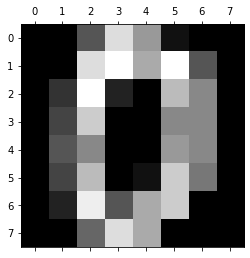

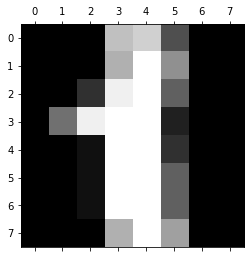

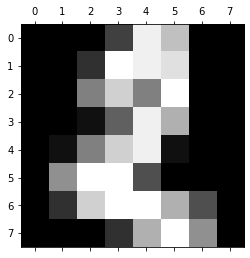

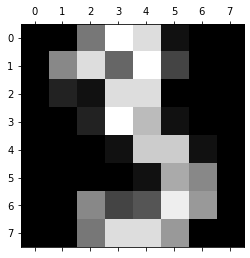

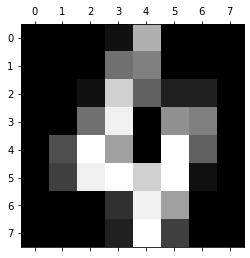

In [15]:
plt.gray()
for i in range(0,5):
    plt.matshow(digits.images[i])

In [17]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [19]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,train_size=0.7)

In [21]:
len(x_train)

1257

In [22]:
len(x_test)

540

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [29]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [30]:
model.score(x_test,y_test)

0.9574074074074074

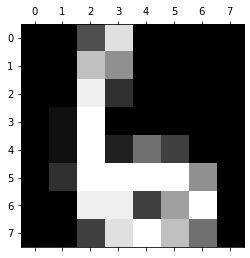

In [31]:
plt.matshow(digits.images[67])

In [32]:
digits.target[67]

6

In [35]:
model.predict([digits.data[67]])

array([6])

In [36]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

To know which numbers among those 5% are predicted wrong, we'll use confusion matrix.

In [37]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[44,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  1,  0,  0,  1,  0,  1,  2],
       [ 0,  0, 62,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 47,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 43,  0,  0],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 52,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 54]], dtype=int64)

Text(69.0, 0.5, 'Predicted')

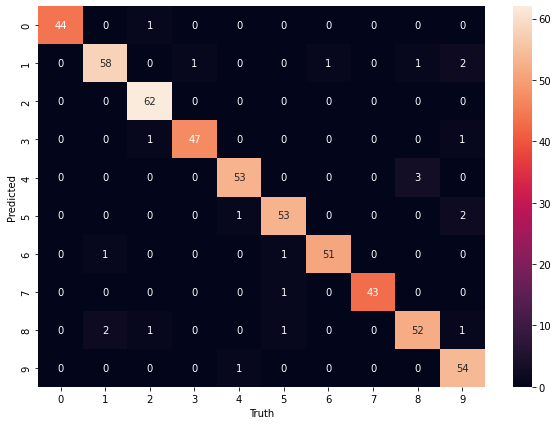

In [50]:
# to visulaize the above data to better understand it 
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Means - 
* 44 times the number was '0', and it rightly predicted it '0'
* Incase of 1, 58 times it gave the correct prediction, 1 time, it predicted the value of 1 as 6 and 2 times the value of 1 as 8
* Likewise...